# Introducción


Para el mundo del  Retail(Tiendas por departamento) es todo un reto mantener la lealtad de sus consumidores ya que en la actualidad existe mucha competencia en el rubro, por ello es muy importante el análisis sobre comportamiento del consumidor y hábitos de compra por que esto proporciona información completa sobre las preferencias, tendencias y patrones de los consumidores durante sus experiencias de compra, lo que permitirá tomar decisiones acerca de los  consumidores, ayudando a las empresas a diseñar estrategias de marketing específicas, optimizar las ofertas de productos y mejorar la satisfacción general del cliente.



## Data set


Es por eso que el Data set a analizar posee datos de compras de clientes en diferentes sucursales alrededor de varias ciudades de una misma tienda de retail, a continuación, se presenta a continuación un diccionario de datos que describirá a cabalidad cada columna del Data Set a trabaja.

## Diccionario de datos

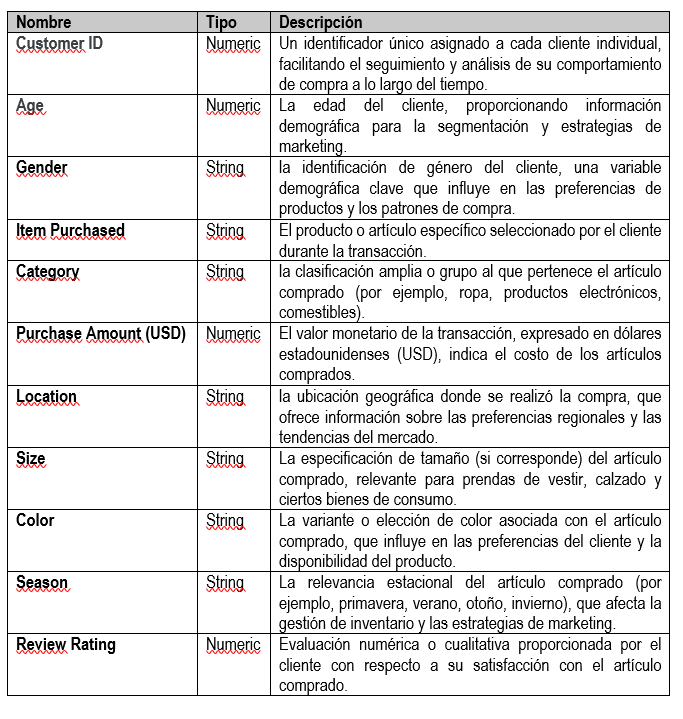


## Hipótesis

 Teniendo una visión general de las descripciones de las columnas a trabajar podemos plantear las siguientes hipótesis:
-	¿Cuál es la sucursal con mayores ventas y cual sucursal la más baja?
-	¿Cuál es la distribución de ventas entre las mujeres y los hombres?
-	¿Cuál es el método de pago preferido por los clientes?
-	¿Hay temporadas en las que las ventas son mejores?
-	¿Existe relación entre las categorías de productos y ciertos grupos de edad o géneros?
- ¿Existe relación entre las ventas y edad?



# Análisis de los Datos

## Importaciones


### Importación de las librerias

In [230]:
import pandas as pd # Importación pandas para la estrcuturación de datos
import numpy as np # Importación NumPy para funcones matematica
import matplotlib.pyplot as plt # Importación Matplotlib para la visualización
import seaborn as sns # Importación de Seaborn para visualización avanzada
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

### Importación del DataSet

In [231]:
df = pd.read_csv("/content/shopping_behavior_trends.csv",sep=';')

## Explorando los datos



In [232]:
df.shape #Muestra las dimensiones del dataSet

(3900, 18)

In [233]:
df.head() #Muestra las primeras 5 columnas del dataSet

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [234]:
df.tail(5) #Muestras las 5 ultimas columanas

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly
3899,3900,52,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Store Pickup,No,No,33,Venmo,Quarterly


In [235]:
df.info()  #Muestra informacion mas detallada de las columnas del dataSet, podemos saber si alguna columna presenta nulos y tipo da dato

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

*   Podemos observar que ninguna columna posee datos nulos

---









In [236]:
print(df.apply(lambda col: col.unique())) #muestra los valores unicos por cada columna

Customer ID               [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
Age                       [55, 19, 50, 21, 45, 46, 63, 27, 26, 57, 53, 3...
Gender                                                       [Male, Female]
Item Purchased            [Blouse, Sweater, Jeans, Sandals, Sneakers, Sh...
Category                       [Clothing, Footwear, Outerwear, Accessories]
Purchase Amount (USD)     [53, 64, 73, 90, 49, 20, 85, 34, 97, 31, 68, 7...
Location                  [Kentucky, Maine, Massachusetts, Rhode Island,...
Size                                                          [L, S, M, XL]
Color                     [Gray, Maroon, Turquoise, White, Charcoal, Sil...
Season                                       [Winter, Spring, Summer, Fall]
Review Rating             [3.1, 3.5, 2.7, 2.9, 3.2, 2.6, 4.8, 4.1, 4.9, ...
Subscription Status                                               [Yes, No]
Shipping Type             [Express, Free Shipping, Next Day Air, Standar...
Discount App

In [237]:
df.nunique() # Muestra el numero de valores unicos por columna

Customer ID               3900
Age                         53
Gender                       2
Item Purchased              25
Category                     4
Purchase Amount (USD)       81
Location                    50
Size                         4
Color                       25
Season                       4
Review Rating               26
Subscription Status          2
Shipping Type                6
Discount Applied             2
Promo Code Used              2
Previous Purchases          50
Payment Method               6
Frequency of Purchases       7
dtype: int64

In [238]:
df.drop_duplicates() #Verificamos que no tengamos datos duplicados

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly



*   No hay valores duplicados




## Limpieza de datos


In [239]:
df.columns #Muestra los nombres de las columnas

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [240]:
df.drop(['Customer ID', 'Review Rating', 'Shipping Type','Discount Applied', 'Promo Code Used','Previous Purchases'], axis=1, inplace=True) #Se eliminan columnas que no se utilizaran
df.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Subscription Status,Payment Method,Frequency of Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,Yes,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,Yes,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,Yes,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,Yes,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,Yes,PayPal,Annually


In [241]:
#Defino el dataFrame para trabajar con los algoritmos de machine learning
df_ml = df.copy()
# Inicializar un diccionario para los codificadores
encoders = {}
for column in ['Gender', 'Category','Item Purchased', 'Location', 'Season', 'Subscription Status', 'Payment Method', 'Frequency of Purchases','Size', 'Color']:
    encoder = LabelEncoder()
    df_ml[column] = encoder.fit_transform(df[column])
    encoders[column] = encoder  # Guardar el codificador para uso futuro
df_ml.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Subscription Status,Payment Method,Frequency of Purchases
0,55,1,2,1,53,16,0,7,3,1,5,3
1,19,1,23,1,64,18,0,12,3,1,1,3
2,50,1,11,1,73,20,2,12,1,1,2,6
3,21,1,14,2,90,38,1,12,1,1,4,6
4,45,1,2,1,49,36,1,21,1,1,4,0


##Visualizaciones

In [242]:
#Analisis sobre las tendencias por sucursales
location_groups = df.groupby("Location")
#cantidad de ventas por sucursal
location_counts = df["Location"].value_counts()
print("N° de ventas por sucursales:\n", location_counts)

N° de ventas por sucursales:
 Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland          86
Delaware          86
Vermont           85
Louisiana         84
North Dakota      83
Missouri          81
West Virginia     81
New Mexico        81
Mississippi       80
Indiana           79
Georgia           79
Kentucky          79
Arkansas          79
North Carolina    78
Connecticut       78
Virginia          77
Ohio              77
Tennessee         77
Texas             77
Maine             77
South Carolina    76
Colorado          75
Oklahoma          75
Wisconsin         75
Oregon            74
Pennsylvania      74
Washington        73
Michigan          73
Alaska            72
Massachusetts     72
Wyoming           71
Utah              71
New Hampshire     71
South Dakota      70
Iowa              69
Florida           68
New Jersey      

In [243]:
#Analisis sobre las tendencias por sucursales
location_groups = df.groupby("Location")
#cantidad de ventas por sucursal
location_counts = df["Location"].value_counts()
print("N° de ventas por sucursales:\n", location_counts)

N° de ventas por sucursales:
 Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland          86
Delaware          86
Vermont           85
Louisiana         84
North Dakota      83
Missouri          81
West Virginia     81
New Mexico        81
Mississippi       80
Indiana           79
Georgia           79
Kentucky          79
Arkansas          79
North Carolina    78
Connecticut       78
Virginia          77
Ohio              77
Tennessee         77
Texas             77
Maine             77
South Carolina    76
Colorado          75
Oklahoma          75
Wisconsin         75
Oregon            74
Pennsylvania      74
Washington        73
Michigan          73
Alaska            72
Massachusetts     72
Wyoming           71
Utah              71
New Hampshire     71
South Dakota      70
Iowa              69
Florida           68
New Jersey      

* Montana es la sucursal que genero mas numero en ventas con 96 ventas realizadas, en contraste con las sucursales de Kansas y Rhode Island con 63 ventas

In [244]:
location_purchase_stats = location_groups["Purchase Amount (USD)"].agg(["mean", "median", "sum"]) #Media, mediana y suma del monto de compra para cada sucursal
location_purchase_sorted = location_purchase_stats.sort_values(by='sum', ascending=False)
print("Regional Purchase Amount Stats:\n", location_purchase_sorted)

Regional Purchase Amount Stats:
                      mean  median   sum
Location                               
Montana         60.250000    64.0  5784
Illinois        61.054348    65.0  5617
California      59.000000    57.0  5605
Idaho           60.075269    62.0  5587
Nevada          63.379310    66.0  5514
Alabama         59.112360    56.0  5261
New York        60.425287    62.0  5257
North Dakota    62.891566    64.0  5220
West Virginia   63.876543    66.0  5174
Nebraska        59.448276    58.0  5172
New Mexico      61.901235    63.0  5014
Minnesota       56.556818    53.0  4977
Pennsylvania    66.567568    70.0  4926
Mississippi     61.037500    64.0  4883
Alaska          67.597222    68.5  4867
Vermont         57.176471    54.0  4860
Louisiana       57.714286    55.5  4848
Virginia        62.883117    62.0  4842
Arkansas        61.113924    58.0  4828
Maryland        55.755814    52.0  4795
Tennessee       61.974026    61.0  4772
Delaware        55.325581    52.5  4758
North C

* Montana se mantiende en el top siendo el que mas dinero recaudo, esto concuerda con el numero de ventas que fue menor , lo mismo pasa para las que tienen ventas menores.
* Hay que considerar que las que tuvieron mejores promedios en los montos recaudados por las ventas fueron Arizona y Pennsylvania

<Axes: title={'center': 'N° de clientes por Sucursal'}, xlabel='Location', ylabel='N° de clientes'>

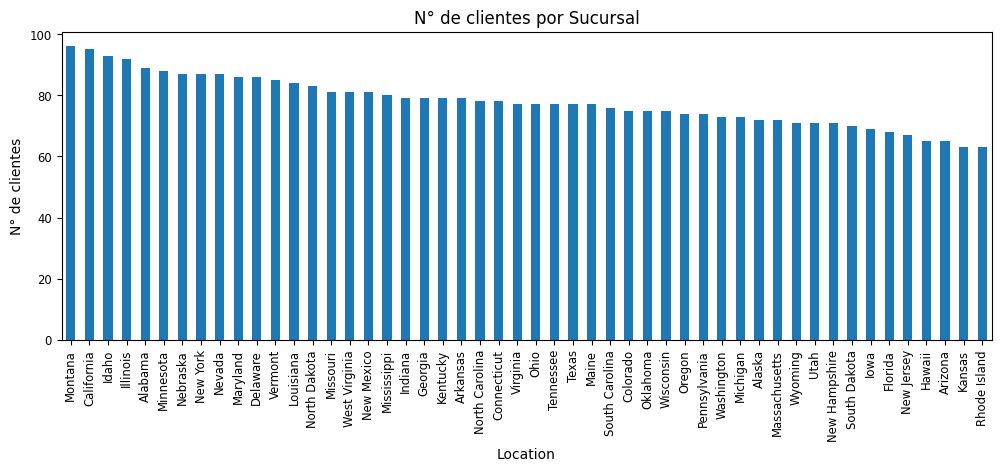

In [245]:
# Numero de clientes por sucursal
location_counts.plot(kind = "bar", rot = 90, figsize = (12,4),fontsize = "small", title = "N° de clientes por Sucursal", ylabel = "N° de clientes")

*  Montana tiene la mayor cantidad de clientes.
*  Rhode Island, podria ser foco importante para campañas de marketing que permitan a un nuevos compradores.

<Axes: title={'center': 'Porcentaje de distribución por género'}, ylabel='count'>

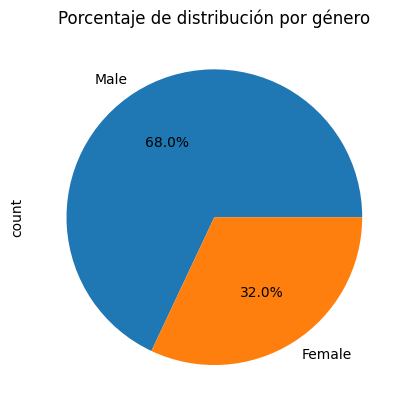

In [246]:
#Distribución por genero
gender_purchase = df['Gender'].value_counts()
gender_purchase.plot(kind = "pie", autopct = '%.1f%%', title ="Porcentaje de distribución por género")

*  Los hombres contribuyen a más de la mitad de las compras totales, representando el 68%, mientras que las mujeres representan sólo el 32% de las compras totales.



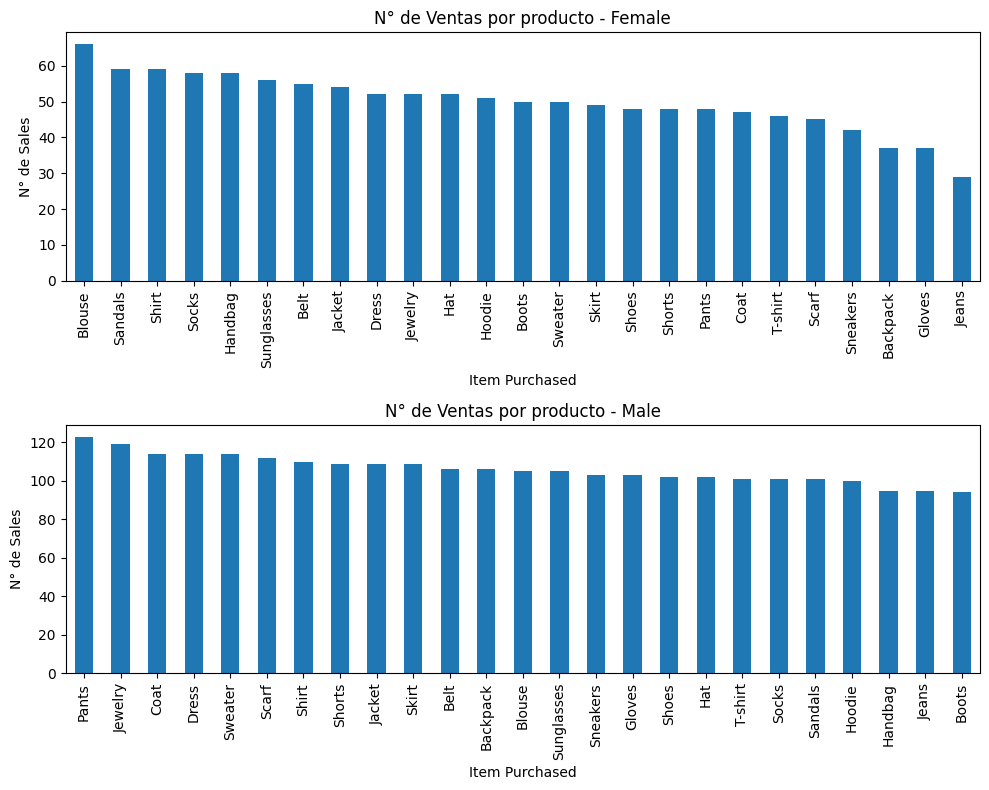

In [247]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

#Calculo por mujer
df_female = df[df['Gender'] == "Female"]
product_count_female = df_female['Item Purchased'].value_counts()
product_count_female.plot(kind = "bar", title = "N° de Ventas por producto - Female", ylabel = "N° de Sales", ax=ax1)

#Calculo por hombre
df_male = df[df['Gender'] == "Male"]
product_count_male = df_male['Item Purchased'].value_counts()
product_count_male.plot(kind = "bar", title = "N° de Ventas por producto - Male", ylabel = "N° de Sales", ax=ax2)


plt.tight_layout()

# Mostrar la figura con ambos gráficos
plt.show()

* El productos mas comprado por mujeres son las blusas(Blouse) y entre los hombres los pants

In [248]:
# Analisis de las categorias mas populares por sucursal
category_counts = location_groups["Category"].value_counts()
category_counts

Location   Category   
Alabama    Clothing       41
           Accessories    25
           Footwear       15
           Outerwear       8
Alaska     Clothing       33
                          ..
Wisconsin  Outerwear       3
Wyoming    Clothing       31
           Accessories    23
           Footwear       11
           Outerwear       6
Name: count, Length: 200, dtype: int64

<Axes: title={'center': 'N° de Ventas por Categoria'}, xlabel='Category', ylabel='N° Sales'>

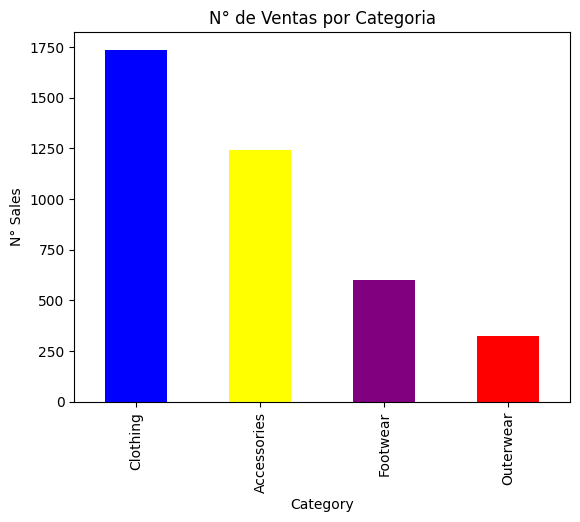

In [249]:
#Grafico de barra para graficar el numero de ventas por categorias
category_count = df["Category"].value_counts()
category_count.head()
category_count.plot(kind = "bar", color = ['blue','yellow','purple','red'], title = "N° de Ventas por Categoria", ylabel = "N° Sales")

*  Clothing tiene el mejor historial de compras y la Outerwear tiene el más bajo.

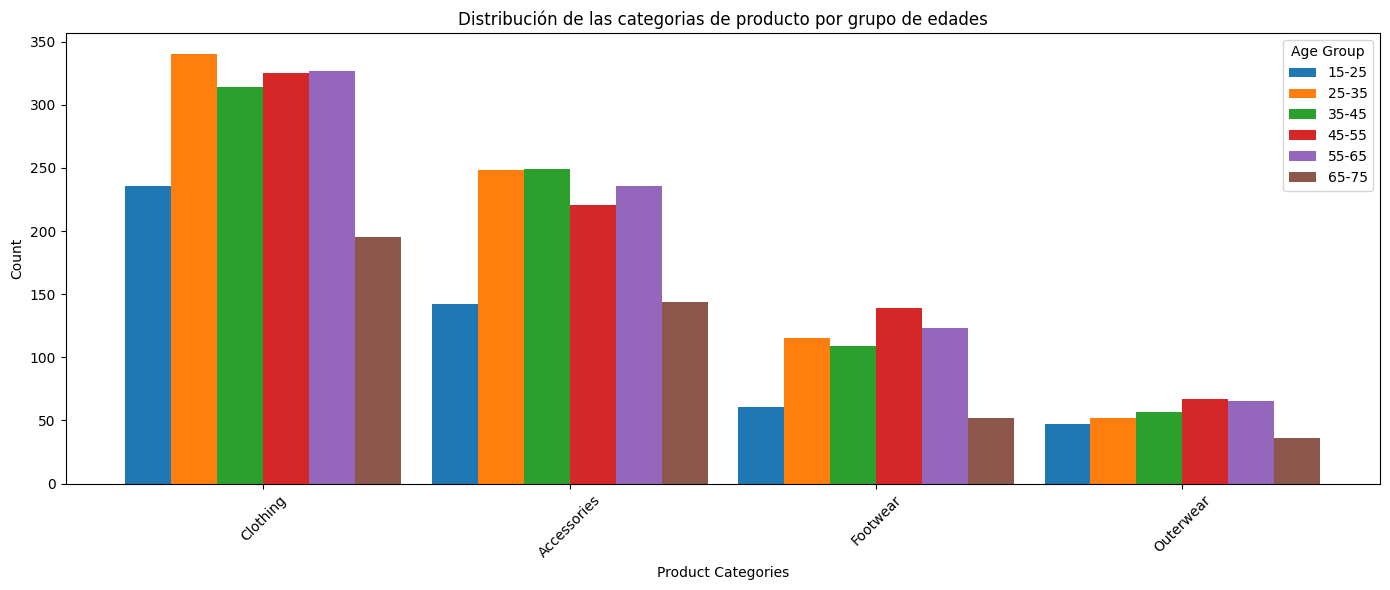

In [250]:
age_groups = [15, 25, 35, 45, 55, 65] #Limites de grupo de edad. Ejemplo : 15-25, 25-35 ...

# Crea subplots por cada grupo de edad
fig, ax = plt.subplots(figsize=(14, 6))

# Inicializar un diccionario para almacenar recuentos de categorías para cada grupo de edad
category_counts_by_age = {age: [] for age in age_groups}

# Calcular la cantidad por cetegoria counts por cada grupo de edad
for age in age_groups:
    age_group_data = df[(df['Age'] >= age) & (df['Age'] < age + 10)]
    category_counts = age_group_data['Category'].value_counts()
    category_counts_by_age[age] = category_counts

# Create the bar chart
width = 0.15
x = np.arange(len(category_counts_by_age[age_groups[0]].index))

for i, age in enumerate(age_groups):
    category_counts = category_counts_by_age[age]
    ax.bar(x + i * width, category_counts, width=width, label=f'{age}-{age+10}')

ax.set_xlabel('Product Categories')
ax.set_ylabel('Count')
ax.set_title('Distribución de las categorias de producto por grupo de edades')
ax.set_xticks(x + width * (len(age_groups) - 1) / 2)
ax.set_xticklabels(category_counts_by_age[age_groups[0]].index, rotation=45)
ax.legend(title='Age Group')

plt.tight_layout()
plt.show()


*   Podemos observar , que la ropa(clothing) es la categoría mas pupular entre todos los grupos de edades al igual que la ropa de abrigo(outerwear), los accesorios (Accessories) son muy populares en todos los grupos de edades excepto en los de 15-25 y 65-75 años. Sin embargo, hemos visto que en la categoría de calzado(Footwear) es más popular en el grupo de edad de 45 a 55 años.

In [251]:
#Medio de pago preferido por sucursal
payment_method = location_groups['Payment Method'].value_counts()
print(payment_method)

Location  Payment Method
Alabama   Debit Card        20
          PayPal            19
          Credit Card       17
          Venmo             15
          Bank Transfer     10
                            ..
Wyoming   Credit Card       17
          Venmo             11
          Cash              10
          Bank Transfer      7
          PayPal             6
Name: count, Length: 300, dtype: int64


<Axes: title={'center': 'Método de Pago'}, xlabel='Método de Pago', ylabel='Numero de clientes'>

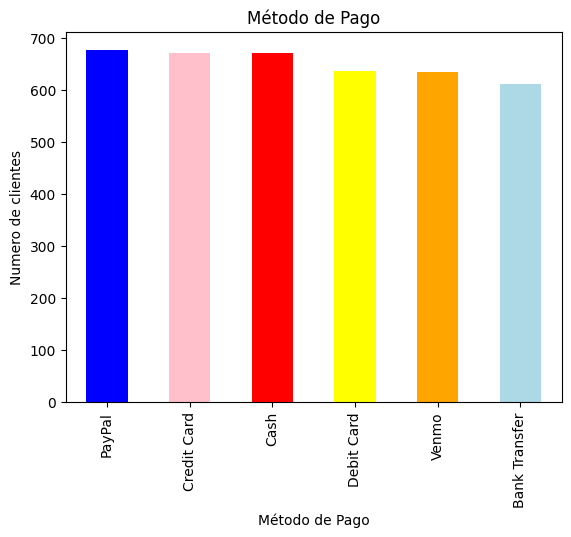

In [252]:
# Visualizacion por metodo de pago

payment_method = df["Payment Method"].value_counts()
payment_method.plot(kind = "bar", color = ['blue','pink','red','yellow','orange','lightblue'], title = "Método de Pago", ylabel = "Numero de clientes", xlabel = "Método de Pago")

In [253]:
#Tendencias por sucursal
for location, location_data in location_groups:
    print(f"Regional Trends for {location}:")

    # Calculate el promedio de compra
    avg_purchase_amount = location_data["Purchase Amount (USD)"].mean()
    print(f"Monto Promedio de Compra: ${avg_purchase_amount:.2f}")

    # Muestra la categoria mas popular del porducto mas vendido
    popular_categories = location_data["Category"].value_counts().idxmax()
    print(f"Categoria Más Popular: {popular_categories}")

    # Muestra el medio de pago mas popular
    payment_method = location_data["Payment Method"].value_counts().idxmax()
    print(f"Metodo de Pago Más Popular: {payment_method}")

    print("\n")


Regional Trends for Alabama:
Monto Promedio de Compra: $59.11
Categoria Más Popular: Clothing
Metodo de Pago Más Popular: Debit Card


Regional Trends for Alaska:
Monto Promedio de Compra: $67.60
Categoria Más Popular: Clothing
Metodo de Pago Más Popular: Credit Card


Regional Trends for Arizona:
Monto Promedio de Compra: $66.55
Categoria Más Popular: Clothing
Metodo de Pago Más Popular: Debit Card


Regional Trends for Arkansas:
Monto Promedio de Compra: $61.11
Categoria Más Popular: Clothing
Metodo de Pago Más Popular: Cash


Regional Trends for California:
Monto Promedio de Compra: $59.00
Categoria Más Popular: Clothing
Metodo de Pago Más Popular: PayPal


Regional Trends for Colorado:
Monto Promedio de Compra: $56.29
Categoria Más Popular: Clothing
Metodo de Pago Más Popular: Bank Transfer


Regional Trends for Connecticut:
Monto Promedio de Compra: $54.18
Categoria Más Popular: Clothing
Metodo de Pago Más Popular: PayPal


Regional Trends for Delaware:
Monto Promedio de Compra: $

<Axes: title={'center': 'Impact of Season on Purchase Amount'}, xlabel='Temporada', ylabel='Monto Promedio de Compra'>

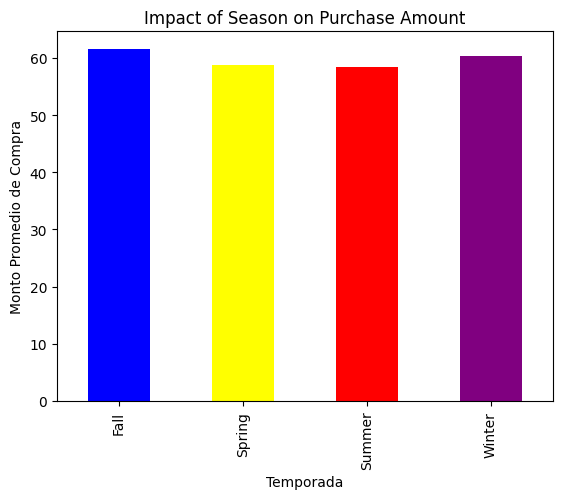

In [254]:
#Visualizacion por sesion
seasons = df['Season'].unique()
average_purchase_season = df.groupby('Season')['Purchase Amount (USD)'].mean()
average_purchase_season.plot(kind = "bar", title = "Impact of Season on Purchase Amount", ylabel = "Monto Promedio de Compra", xlabel = "Temporada", color = ['blue','yellow','red','purple'])

* Fall and Winter tienen el monto de compra promedio más alto de todas las estaciones.
* Spring and Summer no estan muy por detrás de las dos temporadas más altas.

# Machine Learnig

## K-means

In [255]:
df_segments = df_ml[["Age", "Gender", "Purchase Amount (USD)", "Frequency of Purchases"]]
df_segments.head()

,Age,Gender,Purchase Amount (USD),Frequency of Purchases
0,55,1,53,3
1,19,1,64,3
2,50,1,73,6
3,21,1,90,6
4,45,1,49,0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

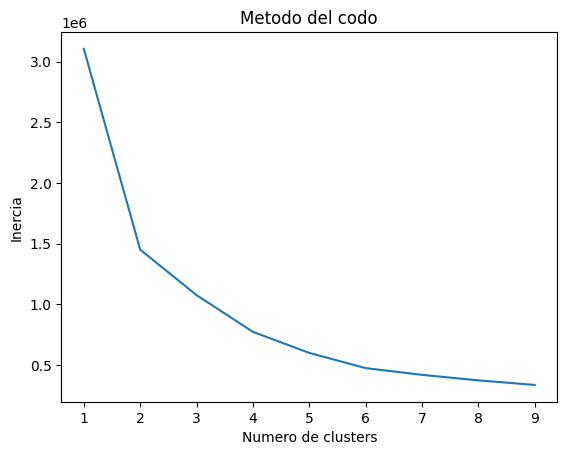

In [256]:
wcss = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_segments)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

plt.plot(range(1, 10), wcss)
plt.title('Metodo del codo')
plt.xlabel('Numero de clusters')
plt.ylabel('Inercia')

# Display the plot
plt.show()

* el método muestra que un 3 es un número de cluster óptimo




In [257]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_segments)
cluster_labels = kmeans.predict(df_segments)
df_segments['Clusters'] = cluster_labels
df_segments


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-257-1e92f8241964>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_segments['Clusters'] = cluster_labels


,Age,Gender,Purchase Amount (USD),Frequency of Purchases,Clusters
0,55,1,53,3,0
1,19,1,64,3,1
2,50,1,73,6,2
3,21,1,90,6,1
4,45,1,49,0,0
...,...,...,...,...,...
3895,40,0,28,6,0
3896,52,0,49,1,0
3897,46,0,33,5,0
3898,44,0,77,6,2


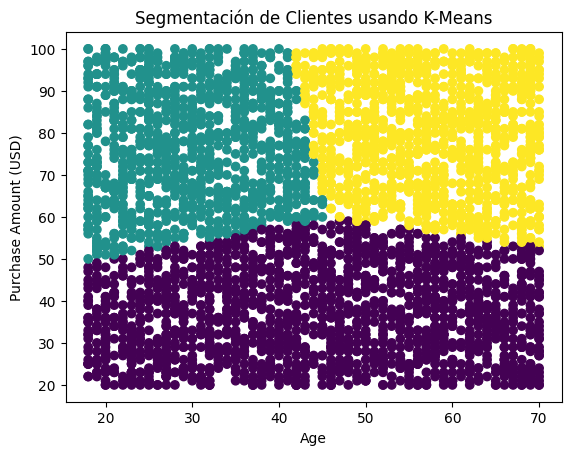

In [258]:
plt.scatter(
    df_segments['Age'],  # X-axis: Age
    df_segments['Purchase Amount (USD)'],  # Y-axis: Purchase Amount (USD)
    c=kmeans.labels_
)

plt.title('Segmentación de Clientes usando K-Means')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.show()

* K-medias nos muestra tres segmentos de clientes distintos, representados por diferentes códigos de color. El segmento 1 comprende clientes jóvenes con alto poder adquisitivo, mientras que el segmento 2 está compuesto por clientes mayores con montos de compra promedio más altos. Por el contrario, el segmento 3 abarca clientes con tendencias de gasto más bajas, que a menudo optan por artículos menos costosos.

# Conclusion

* Montana tiene la mayor cantidad de clientes de todas las sucursales y Kansas y Rhode Island son las que poseen menos , lo que concuerda con la hipótesis establecida.
* Los hombres representan el 67% del total de compras y las mujeres representan el 32% del total, demostrando que los hombres en este caso fueron los que mas compraron .
* Paypal , Credi Card y Cash son los metodos de pago mas elegidos
* Los clientes realizan más compras durante el invierno(winter) y el invierno(Fall) en comparación con el verano(Summer) y la primavera(Spring).
* La ropa(clothing) es la categoría mas pupular entre todos los grupos de edades al igual que la ropa de abrigo(outerwear), los accesorios (Accessories) son muy populares en todos los grupos de edades excepto en los de 15-25 y 65-75 años. Sin embargo, hemos visto que en la categoría de calzado(Footwear) es más popular en el grupo de edad de 45 a 55 años.
* K-medias nos muestra tres segmentos de clientes distintos, representados por diferentes códigos de color. El segmento 1 comprende clientes jóvenes con alto poder adquisitivo, mientras que el segmento 2 está compuesto por clientes mayores con montos de compra promedio más altos. Por el contrario, el segmento 3 abarca clientes con tendencias de gasto más bajas, que a menudo optan por artículos menos costosos.
